# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# pip install citipy

In [31]:
# Dependencies and Setup
import os
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
from scipy.stats import linregress
from datetime import datetime

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 600


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [99]:
# Set the API base URL
weather_api_key = "f8499c6fb120b015599e2efb16980fee"
url = "http://api.openweathermap.org/data/2.5/weather?units=metric&appid={}".format(weather_api_key)

# Define an empty list to fetch the weather data for each city
city_data = []
# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1 
set_count = 1



Beginning Data Retrieval     
-----------------------------


In [100]:
# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
   
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass  ## general purpose statement to handle all errors and continue

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | swan hill
Processing Record 3 of Set 1 | avarua
Processing Record 4 of Set 1 | great yarmouth
Processing Record 5 of Set 1 | dori
Processing Record 6 of Set 1 | mahebourg
Processing Record 7 of Set 1 | marcona
City not found. Skipping...
Processing Record 8 of Set 1 | presidencia roque saenz pena
Processing Record 9 of Set 1 | grand-lahou
Processing Record 10 of Set 1 | salinopolis
Processing Record 11 of Set 1 | nizhniy kuranakh
Processing Record 12 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 13 of Set 1 | provideniya
Processing Record 14 of Set 1 | saint-philippe
Processing Record 15 of Set 1 | hobyo
Processing Record 16 of Set 1 | albany
Processing Record 17 of Set 1 | khatanga
Processing Record 18 of Set 1 | cayenne
Processing Record 19 of Set 1 | tuatapere
Processing Record 20 of Set 1 | isangel
Processing Record 21 of Set 1 | ceres
Processing Record 22 of Set 1 | mar del plata
Processing 

Processing Record 36 of Set 4 | bengkulu
Processing Record 37 of Set 4 | bazarnyye mataki
Processing Record 38 of Set 4 | morant bay
Processing Record 39 of Set 4 | nguiu
City not found. Skipping...
Processing Record 40 of Set 4 | progreso
Processing Record 41 of Set 4 | porto novo
Processing Record 42 of Set 4 | bowen
Processing Record 43 of Set 4 | tuktoyaktuk
Processing Record 44 of Set 4 | nishihara
Processing Record 45 of Set 4 | roma
Processing Record 46 of Set 4 | nizhneyansk
City not found. Skipping...
Processing Record 47 of Set 4 | fort nelson
Processing Record 48 of Set 4 | dongsheng
Processing Record 49 of Set 4 | garden city
Processing Record 0 of Set 5 | waitati
Processing Record 1 of Set 5 | yar-sale
Processing Record 2 of Set 5 | ribeira grande
Processing Record 3 of Set 5 | iranshahr
Processing Record 4 of Set 5 | paragominas
Processing Record 5 of Set 5 | lasa
Processing Record 6 of Set 5 | mpanda
Processing Record 7 of Set 5 | zhumadian
Processing Record 8 of Set 5 |

Processing Record 26 of Set 8 | aykhal
Processing Record 27 of Set 8 | lewistown
Processing Record 28 of Set 8 | sicuani
Processing Record 29 of Set 8 | suixi
Processing Record 30 of Set 8 | krasnoselkup
Processing Record 31 of Set 8 | ullapool
Processing Record 32 of Set 8 | buckeye
Processing Record 33 of Set 8 | goundam
Processing Record 34 of Set 8 | hammerfest
Processing Record 35 of Set 8 | honningsvag
Processing Record 36 of Set 8 | bulgan
Processing Record 37 of Set 8 | aklavik
Processing Record 38 of Set 8 | constitucion
Processing Record 39 of Set 8 | smirnykh
Processing Record 40 of Set 8 | borogontsy
Processing Record 41 of Set 8 | sembe
Processing Record 42 of Set 8 | elizabeth city
Processing Record 43 of Set 8 | tabiauea
City not found. Skipping...
Processing Record 44 of Set 8 | grand gaube
Processing Record 45 of Set 8 | trinidad
Processing Record 46 of Set 8 | vardo
Processing Record 47 of Set 8 | martapura
Processing Record 48 of Set 8 | marsa matruh
Processing Recor

Processing Record 12 of Set 12 | ruatoria
City not found. Skipping...
Processing Record 13 of Set 12 | bubaque
Processing Record 14 of Set 12 | umtata
Processing Record 15 of Set 12 | teahupoo
Processing Record 16 of Set 12 | arlit
Processing Record 17 of Set 12 | malpe
Processing Record 18 of Set 12 | westerland
Processing Record 19 of Set 12 | lompoc
Processing Record 20 of Set 12 | hailun
Processing Record 21 of Set 12 | zapolyarnyy
Processing Record 22 of Set 12 | chivilcoy
Processing Record 23 of Set 12 | rokytne
Processing Record 24 of Set 12 | san vicente
Processing Record 25 of Set 12 | mora
Processing Record 26 of Set 12 | khash
Processing Record 27 of Set 12 | ukiah
Processing Record 28 of Set 12 | am timan
Processing Record 29 of Set 12 | ambilobe
Processing Record 30 of Set 12 | magistralnyy
Processing Record 31 of Set 12 | iznoski
Processing Record 32 of Set 12 | erzin
Processing Record 33 of Set 12 | koshurnikovo
Processing Record 34 of Set 12 | mrirt
City not found. Skip

In [101]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df=pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          548
Lat           548
Lng           548
Max Temp      548
Humidity      548
Cloudiness    548
Wind Speed    548
Country       548
Date          548
dtype: int64

In [102]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ushuaia,-54.8000,-68.3000,12.84,56,87,1.30,AR,2023-02-07 20:30:57
1,swan hill,-35.3378,143.5544,15.67,63,0,4.53,AU,2023-02-07 20:34:27
2,avarua,-21.2078,-159.7750,28.03,78,75,5.14,CK,2023-02-07 20:34:35
3,great yarmouth,52.6083,1.7305,3.86,85,52,2.84,GB,2023-02-07 20:34:40
4,dori,14.0354,-0.0345,28.42,13,100,4.53,BF,2023-02-07 20:34:41


In [103]:
#create directory to save file
output_dir = "output_data"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
    
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [104]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head(5)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ushuaia,-54.8000,-68.3000,12.84,56,87,1.30,AR,2023-02-07 20:30:57
1,swan hill,-35.3378,143.5544,15.67,63,0,4.53,AU,2023-02-07 20:34:27
2,avarua,-21.2078,-159.7750,28.03,78,75,5.14,CK,2023-02-07 20:34:35
3,great yarmouth,52.6083,1.7305,3.86,85,52,2.84,GB,2023-02-07 20:34:40
4,dori,14.0354,-0.0345,28.42,13,100,4.53,BF,2023-02-07 20:34:41


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [105]:
#  Create fields needed for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

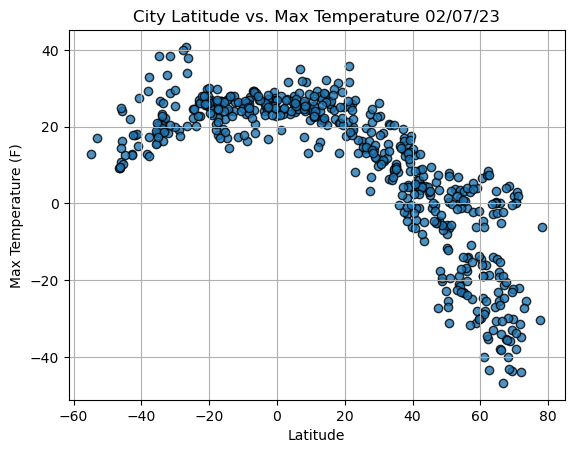

In [106]:
# Build scatter plot for latitude vs. max temperature
plt.scatter(lats,  # sets x_axis
            max_temps,  # sets y_axis
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

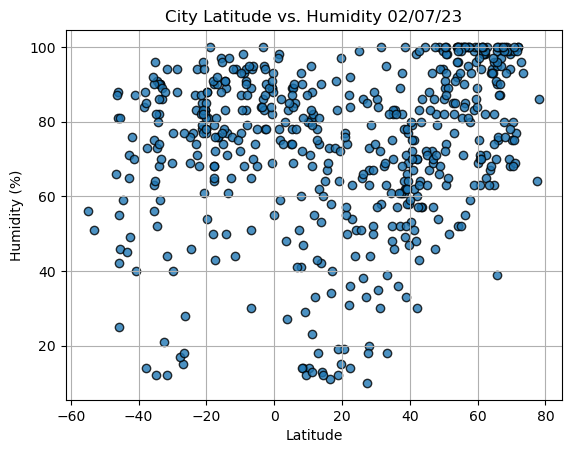

In [107]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(lats,  # sets x_axis
            humidity,  # sets y_axis
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

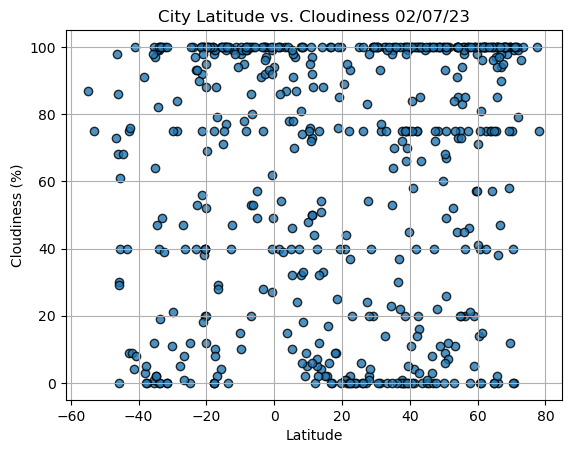

In [108]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats,  # sets x_axis
            cloudiness,  # sets y_axis
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

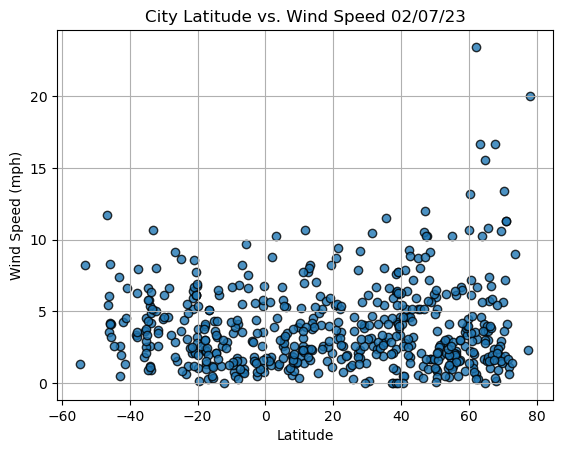

In [109]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(lats,  # sets x_axis
            wind_speed,  # sets y_axis
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [110]:
# Create a linear regression function
from scipy.stats import linregress

In [111]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

# Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
   
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [112]:
## Create Hemispheric DataFrames
index13=city_data_df.loc[13]
index13

City                       albany
Lat                       42.6001
Lng                      -73.9662
Max Temp                     4.29
Humidity                       43
Cloudiness                    100
Wind Speed                   1.79
Country                        US
Date          2023-02-07 20:31:43
Name: 13, dtype: object

In [113]:
city_data_df["Lat"] >= 0

City_ID
0      False
1      False
2      False
3       True
4       True
       ...  
543     True
544     True
545     True
546    False
547     True
Name: Lat, Length: 548, dtype: bool

In [114]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,great yarmouth,52.6083,1.7305,3.86,85,52,2.84,GB,2023-02-07 20:34:40
4,dori,14.0354,-0.0345,28.42,13,100,4.53,BF,2023-02-07 20:34:41
7,grand-lahou,5.1367,-5.0242,26.03,89,46,2.61,CI,2023-02-07 20:34:42
9,nizhniy kuranakh,58.8353,125.4869,-31.13,99,100,0.83,RU,2023-02-07 20:34:42
10,provideniya,64.3833,-173.3000,-26.97,94,57,1.65,RU,2023-02-07 20:34:43


In [115]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df =city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ushuaia,-54.8000,-68.3000,12.84,56,87,1.30,AR,2023-02-07 20:30:57
1,swan hill,-35.3378,143.5544,15.67,63,0,4.53,AU,2023-02-07 20:34:27
2,avarua,-21.2078,-159.7750,28.03,78,75,5.14,CK,2023-02-07 20:34:35
5,mahebourg,-20.4081,57.7000,26.25,83,40,6.17,MU,2023-02-07 20:34:41
6,presidencia roque saenz pena,-26.7852,-60.4388,40.79,15,47,2.88,AR,2023-02-07 20:34:42


###  Temperature vs. Latitude Linear Regression Plot

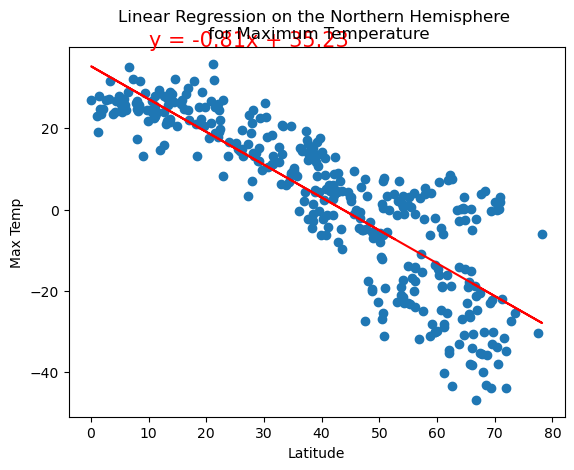

In [116]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature',
                       'Max Temp',(10,40))

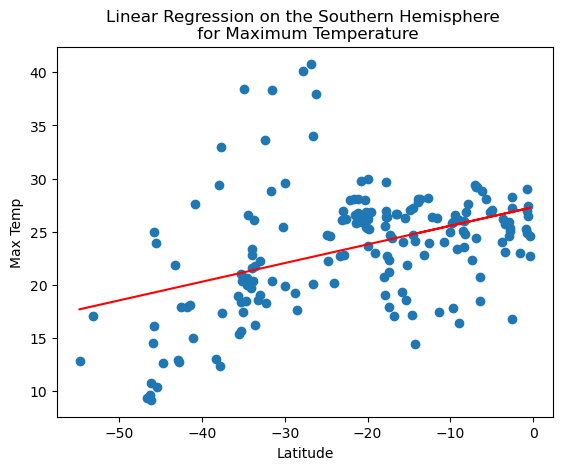

In [117]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature',
                       'Max Temp',(-50,90))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

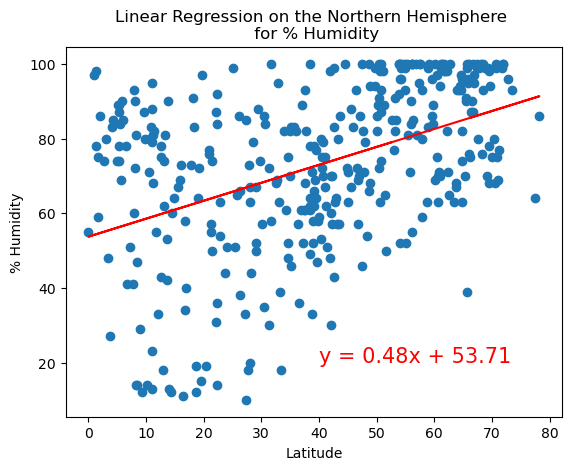

In [118]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       "Linear Regression on the Northern Hemisphere \n for % Humidity",
                       "% Humidity",(40,20))

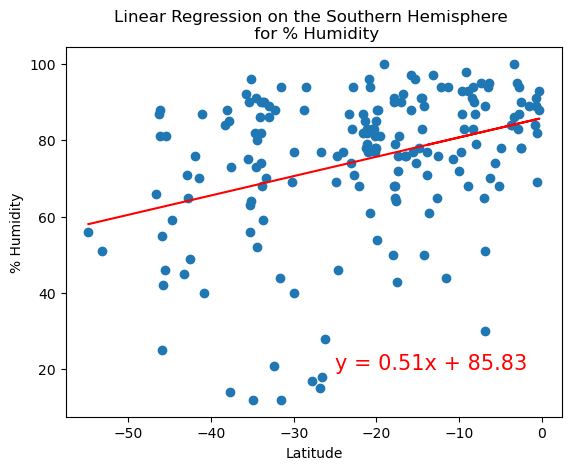

In [119]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       "Linear Regression on the Southern Hemisphere \n for % Humidity",
                       "% Humidity",(-25,20))

### Cloudiness vs. Latitude Linear Regression Plot

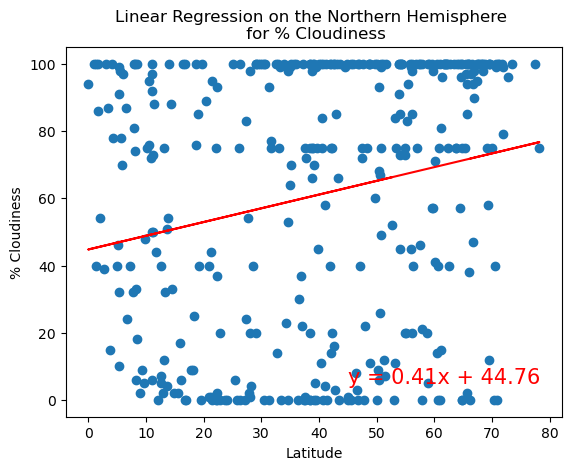

In [120]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       "Linear Regression on the Northern Hemisphere \n for % Cloudiness",
                       "% Cloudiness",(45,5))

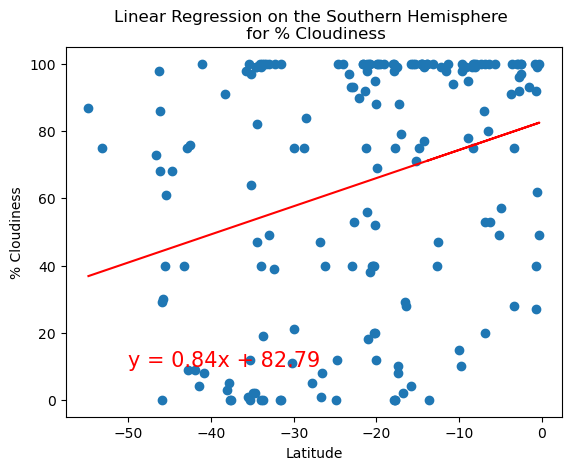

In [121]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       "Linear Regression on the Southern Hemisphere \n for % Cloudiness",
                       "% Cloudiness",(-50,10))

### Wind Speed vs. Latitude Linear Regression Plot

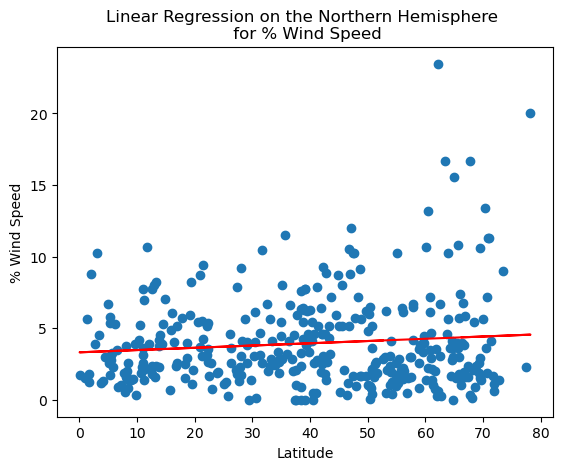

In [122]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       "Linear Regression on the Northern Hemisphere \n for % Wind Speed",
                       "% Wind Speed",(10,40))

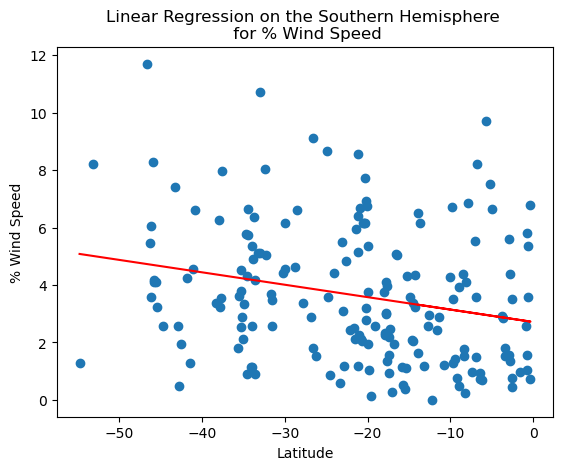

In [123]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       "Linear Regression on the Southern Hemisphere \n for % Wind Speed",
                       "% Wind Speed",(-50,20))